# Programa o Script para reducción de dimensionalidad
# Realizado por : Rolando Ortiz Herbas

In [87]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from decimal import Decimal, getcontext
import csv

In [88]:
# Cargar dataset
# Reemplaza 'dataset.csv' por el nombre de tu archivo
# Asegúrate de que el archivo tenga solo las columnas numéricas necesarias para PCA
getcontext().prec = 30
ruta = "C:/Users/Roland/Documents/UNAD_MEXICO_Matematicas_2022/Semestre_2024_1/ZZZ_Word_y_PT/DatosClientes/Clientes_Dos_Mil_numeros.csv"
data = pd.read_csv(ruta , header=0)
# data = pd.read_csv('dataset.csv')

In [89]:
data.head()

,Ocupacion,NoPago,TotalMonto,EstadoContrato,Producto,FechaInicioC,FechaAdjudicación,FechaUltimoPago,FechaProyectadaFin,MontoVencido,...,Genero,PersonaTipo,dtEstadoContrato,GrupoOrigenVenta,SemanasAdjud,Pagos9,Domicilia_Pago,Email,timetotV,Y
0,47.0,35,302783,6.0,0.0,20150417,20150417,20180221,20200417,5046,...,1.0,0.0,2.0,1.0,0.0,9,1,1,36,1
1,38.0,38,211366,5.0,0.0,20150220,20150220,20180208,20200220,7044,...,0.0,0.0,2.0,3.0,0.0,9,1,1,40,1
2,13.0,50,323640,1.0,0.0,20150220,20160115,20190218,20200220,0,...,1.0,0.0,1.0,3.0,47.0,8,1,1,50,1
3,59.0,60,377036,1.0,0.0,20150417,20150717,20200305,20200417,12566,...,1.0,0.0,1.0,3.0,13.0,9,0,1,61,1
4,97.0,45,392349,6.0,0.0,20150417,20150417,20181226,20200417,6539,...,0.0,1.0,2.0,3.0,0.0,9,0,1,46,1


In [104]:
X1 = data.iloc[:, :-1]
# Y = np.array(data["Y"])
Y = data["Y"]

In [105]:
X1.head()

,Ocupacion,NoPago,TotalMonto,EstadoContrato,Producto,FechaInicioC,FechaAdjudicación,FechaUltimoPago,FechaProyectadaFin,MontoVencido,...,CostoAdmin,Genero,PersonaTipo,dtEstadoContrato,GrupoOrigenVenta,SemanasAdjud,Pagos9,Domicilia_Pago,Email,timetotV
0,47.0,35,302783,6.0,0.0,20150417,20150417,20180221,20200417,5046,...,17468,1.0,0.0,2.0,1.0,0.0,9,1,1,36
1,38.0,38,211366,5.0,0.0,20150220,20150220,20180208,20200220,7044,...,19040,0.0,0.0,2.0,3.0,0.0,9,1,1,40
2,13.0,50,323640,1.0,0.0,20150220,20160115,20190218,20200220,0,...,24485,1.0,0.0,1.0,3.0,47.0,8,1,1,50
3,59.0,60,377036,1.0,0.0,20150417,20150717,20200305,20200417,12566,...,28599,1.0,0.0,1.0,3.0,13.0,9,0,1,61
4,97.0,45,392349,6.0,0.0,20150417,20150417,20181226,20200417,6539,...,22024,0.0,1.0,2.0,3.0,0.0,9,0,1,46


In [106]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X1)

In [107]:
# Crear el modelo PCA
n_components = 15  # Cambia este valor según las dimensiones deseadas
pca = PCA(n_components=n_components)

In [108]:
# Ajustar y transformar los datos
data_pca = pca.fit_transform(data_scaled)

In [109]:
# Crear un DataFrame con los resultados
columns = [f'PC{i+1}' for i in range(n_components)]
df_pca = pd.DataFrame(data_pca, columns=columns)

In [110]:
print("Varianza explicada por cada componente:")
print(pca.explained_variance_ratio_)

print("\nResultados del PCA:")
print(df_pca)

Varianza explicada por cada componente:
[0.25438166 0.14530969 0.10120508 0.05996386 0.05788795 0.05205099
 0.04160385 0.03823693 0.03726269 0.03584321 0.03494824 0.03278803
 0.02887054 0.0271182  0.01917591]

Resultados del PCA:
           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -0.085569  3.705398  2.427960 -1.371650 -0.922134 -1.632122 -1.703357   
1    -0.080109  3.856955  2.158675 -0.349628 -0.994316 -1.174705 -0.616766   
2    -2.580049  1.337888 -0.763909 -1.180211 -0.431601 -1.400349 -1.860741   
3    -3.706099  2.075186  1.776740 -0.406550 -1.694717  0.172662 -0.660180   
4    -2.272102  2.924972  3.726790  2.705101  0.520984  0.536134  0.524437   
...        ...       ...       ...       ...       ...       ...       ...   
1995 -0.577556 -1.790352 -0.044922 -0.089139 -0.053562 -0.391269 -0.826320   
1996  0.635987  2.450529  0.810045 -0.528474 -1.075083  0.798395 -0.094607   
1997  1.496012  1.721213 -2.293196  0.211327  0.478305  0.791944 -0.

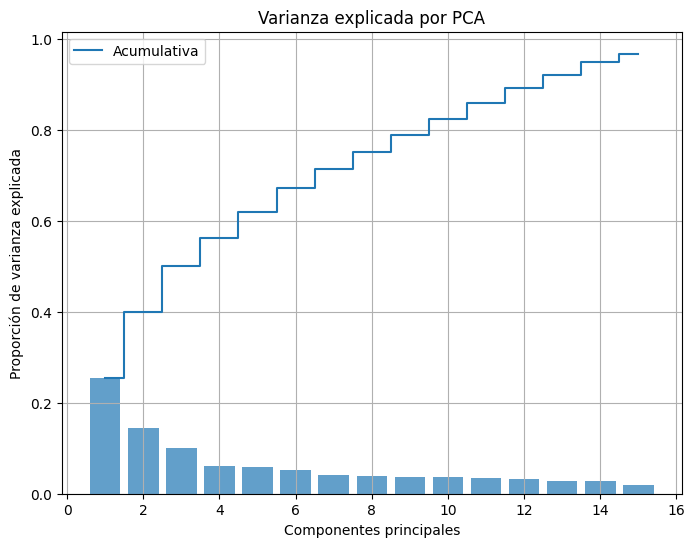

In [111]:
# Gráfico de varianza explicada
plt.figure(figsize=(8, 6))
plt.bar(range(1, n_components + 1), pca.explained_variance_ratio_, alpha=0.7, align='center')
plt.step(range(1, n_components + 1), np.cumsum(pca.explained_variance_ratio_), where='mid', label='Acumulativa')
plt.ylabel('Proporción de varianza explicada')
plt.xlabel('Componentes principales')
plt.title('Varianza explicada por PCA')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# df_pca.to_csv('output.csv', index=False)
data = pd.concat([df_pca, Y], axis=1)

data.to_csv('C:/Users/Roland/Documents/UNAD_MEXICO_Matematicas_2022/Semestre_2024_1/ZZZ_Word_y_PT/DatosClientes/OUTPUT_PCA.csv', index=False, quoting=csv.QUOTE_NONNUMERIC)